## Project: Investigate a Dataset [ StockX Sneaker Data Contest]

### Table of content 

• Introduction 

• Data Wrangling 

• Exploratory Data Analysis 

• conclusion


## Introduction 


### Data Description 

The data consists of a random sample of all Off-White x Nike and Yeezy 350 sales from between 9/1/2017 (the month that Off-White first debuted “The Ten” collection) and the present. There are 99,956 total sales in the data set; 27,794 Off-White sales, and 72,162 Yeezy sales. The sample consists of U.S. sales only.
Here's a brief explanation of each column in the dataset .

• Order Date: The order date of the sneakers.

• Brand: Brand of the sneaker.

• Sneaker Name: Name of the sneaker.

• Sale Price: Sale price of the sneaker.

• Retail Price: Retail price of the sneaker.

• Release Date: Release date of the sneaker.

• Shoe Size: Shoe size of the sneaker.

• Buyers Region: Buyer region of the sneaker.


### Question(s) for the Analysis 

• What shoes are most popular?

• Which shoes have the best/worst profit margins?

• What factors affect profit margin?

• Top 5 regions with the most sales 

• Last 5 regions with the least sales


### Importing the packages to be used 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

### Data Wrangling 
In this section, we would try to point out instances and occurences in the dataset that might need some cleaning and wrangling. To do this we would proceed by first loading the dataset into the workspace and then reading it to have a first view of what the data look like.`

In [2]:
stock_df = pd.read_csv('stockx.csv')
stock_df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$565,$220,12/26/18,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$598,$220,12/26/18,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$605,$220,12/26/18,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$650,$220,12/26/18,11.0,California


From the data above we can tell that the dataset above contains 99956 rows and 8 columns.



Let's proceed to checking the dataset in more depth in order to further draft out wrangling and cleansing techniques.

In [3]:
# checking the null values and data types of the data set
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


Looking above, there are no null values in the entire dataset. As for the data types, not all the columns are in their appropriate data type the 'Retail price' and 'Sale Price' columns which are objects instead of float. The 'Order Date' column is also an object instead of date time data type.
We would be changing these columns to their right data types.

In [4]:
# checking for unique values in each columns 
stock_df.nunique()

Order Date       531
Brand              2
Sneaker Name      50
Sale Price      1489
Retail Price       8
Release Date      35
Shoe Size         26
Buyer Region      51
dtype: int64

In [5]:
# checking just the headers
stock_df.head(0)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region


The column names are correctly spelt or  properly capitalized, we would rename the columns and then convert them all to lower case

### Data Cleaning

Now that we've figured out everything we need to know about our data, let's dive right into cleaning the data. Before we do that, let's outline all the steps that we would be taking so we can reference anytime and also use as a pointer for comppletion:

• Changing the 'Sale price' column to the right data type

• Changing the 'Retail Price' column to the right data type

• Changing the 'Order Date' column to the right data type


### Making the colums all lowercase

In [6]:
# changing columns to lower case
# we would use the dataframe replace function to change column names to lower case
stock_df.columns= stock_df.columns.str.lower()
stock_df.head()

,order date,brand,sneaker name,sale price,retail price,release date,shoe size,buyer region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [7]:
# replacing the space between columns with "_"
# we would use the dataframe replace function to replace all spaces in the columns names with '_'
# assign it back to columns and check the columns header 
stock_df.columns = stock_df.columns.str.replace(' ', '_')
stock_df.head(2)


,order_date,brand,sneaker_name,sale_price,retail_price,release_date,shoe_size,buyer_region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California


In [13]:
# Convert 'retail_price' and 'sale_price' columns to string type
stock_df['retail_price'] = stock_df['retail_price'].astype(str)
stock_df['sale_price'] = stock_df['sale_price'].astype(str)
stock_df['retail_price'] = stock_df['retail_price'].str.replace('$', '').str.replace(',', '')
stock_df['sale_price'] = stock_df['sale_price'].str.replace('$', '').str.replace(',', '')

# Convert 'retail_price' and 'sale_price' columns to float data type
stock_df['retail_price'] = stock_df['retail_price'].astype(float)
stock_df['sale_price'] = stock_df['sale_price'].astype(float)

In [14]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_date    99956 non-null  object 
 1   brand         99956 non-null  object 
 2   sneaker_name  99956 non-null  object 
 3   sale_price    99956 non-null  float64
 4   retail_price  99956 non-null  float64
 5   release_date  99956 non-null  object 
 6   shoe_size     99956 non-null  float64
 7   buyer_region  99956 non-null  object 
dtypes: float64(3), object(5)
memory usage: 6.1+ MB


In [15]:
# changing the 'order_date' column to date time data type
# using the pandas function to convert 'date_column' to datetime type
stock_df['order_date'] = pd.to_datetime(stock_df['order_date'], format='%m/%d/%y')

In [16]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_date    99956 non-null  datetime64[ns]
 1   brand         99956 non-null  object        
 2   sneaker_name  99956 non-null  object        
 3   sale_price    99956 non-null  float64       
 4   retail_price  99956 non-null  float64       
 5   release_date  99956 non-null  object        
 6   shoe_size     99956 non-null  float64       
 7   buyer_region  99956 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 6.1+ MB


 We now have our final dataframe with all the information we needed for the exploration clean and ready for analysis. 99956 rows and 8 columns.

### Exploratory Data Analysis

In this section we would be diving deep into the questions that were posed earlier and how we can answer the questions with the data available using apporpriate visuals and chart types.

### Research Question 1( What shoes are most popular?)

We would like to know the most popular shoe amongst all, but before determining the most popular shoe overall, we aim to identify the range of brands available. Subsequently, we'll assess which brand of sneakers has the highest order frequency.

In [17]:
# checking how many unique brand we have 
stock_df['brand'].unique()

array([' Yeezy', 'Off-White'], dtype=object)

Based on the provided information, it's evident that there are only two brands of sneakers available. Now, our next step is to determine the frequency of each brand to ascertain which brand was the most ordered.

In [18]:
stock_df.brand.value_counts()

brand
 Yeezy       72162
Off-White    27794
Name: count, dtype: int64

<Axes: ylabel='count'>

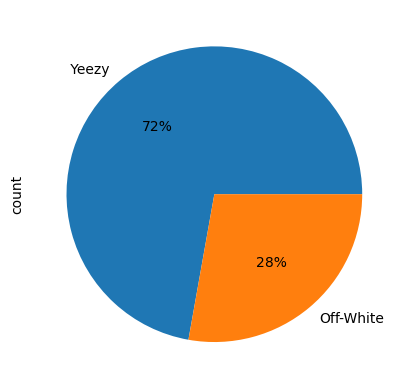

In [19]:
# a simple piechart showcasing the percentage of both brands
stock_df.brand.value_counts().plot(kind='pie', autopct='%1.0f%%')

The chart above illustrates that 'Yeezy' constituted 72% of the orders, while 'Off-White' accounted for the remaining 28%. This suggests that 'Yeezy' is the dominant brand. However, further investigation is required to determine the most popular shoe. While the brand information can be useful for understanding overall brand popularity, it's not sufficient for identifying the most popular individual shoe model.

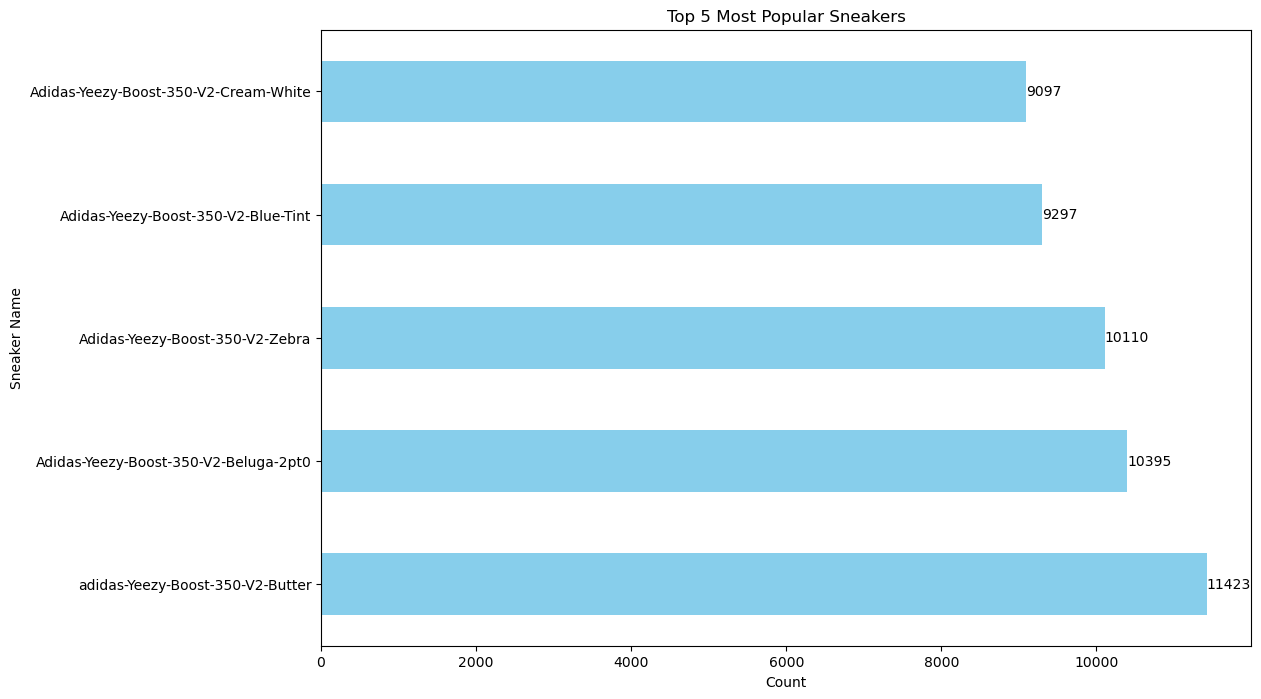

In [20]:
top_5 = stock_df['sneaker_name'].value_counts().head(5)
plt.figure(figsize=(12, 8))
top_5.plot(kind='barh', color='skyblue')
plt.title('Top 5 Most Popular Sneakers')
plt.xlabel('Count')
plt.ylabel('Sneaker Name')
[plt.text(count, i, str(count), ha='left', va='center') for i, count in enumerate(top_5)]
plt.show()

By restricting the selection to the top 5 shoes, and with 'adidas-yeezy-Boost-350-V2-Butter' emerging as the most frequently ordered shoe, it's evident that 'adidas-yeezy-Boost-350-V2-Butter' holds the distinction of being the most sought-after shoe among the 50 distinct shoe varieties.

### Research Question 2(Which shoes have the best/worst profit margins?)

We would like to calculate the profit margin for each shoe, to do that we would need to subtract the cost price (retail price) from the selling price, then divide the result by the selling price, and finally multiply by 100 to express the result as a percentage.

In [21]:
stock_df['profit_margin'] = ((stock_df['sale_price'] - stock_df['retail_price']) / stock_df['sale_price']) * 100
best_profit_margin_shoes = stock_df.loc[stock_df['profit_margin'].idxmax(), ['sneaker_name', 'profit_margin']]
worst_profit_margin_shoes = stock_df.loc[stock_df['profit_margin'].idxmin(), ['sneaker_name', 'profit_margin']]

print("Shoes with the best profit margin:\n", best_profit_margin_shoes)
print("\nShoes with the worst profit margin:\n", worst_profit_margin_shoes)

Shoes with the best profit margin:
 sneaker_name     Air-Jordan-1-Retro-High-Off-White-Chicago
profit_margin                                    95.308642
Name: 26870, dtype: object

Shoes with the worst profit margin:
 sneaker_name     Adidas-Yeezy-Boost-350-V2-Sesame
profit_margin                           -18.27957
Name: 70545, dtype: object


#### Air-Jordan-1-Retro-High-Off-White-Chicago boasts the highest profit margin at 95.308642, whereas Adidas-Yeezy-Boost-350-V2-Sesame exhibits the lowest at -18.27957.

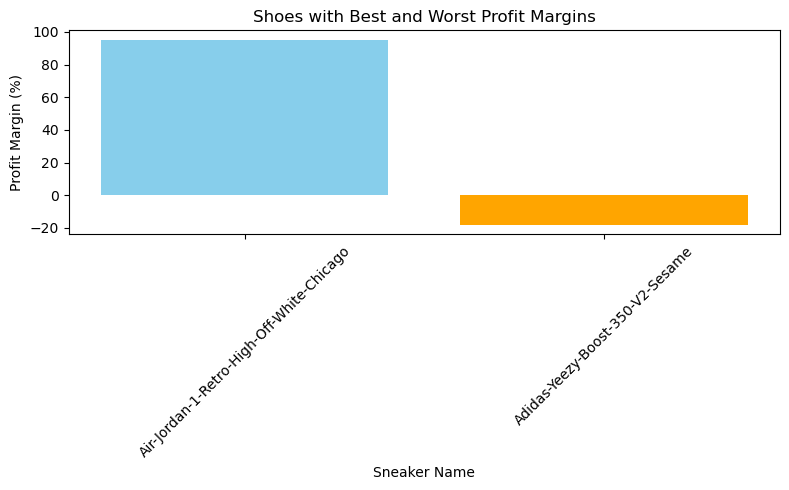

In [22]:
best_and_worst_shoes = pd.concat([stock_df.nlargest(1, 'profit_margin'), stock_df.nsmallest(1, 'profit_margin')])

plt.figure(figsize=(8, 5))
plt.bar(best_and_worst_shoes['sneaker_name'], best_and_worst_shoes['profit_margin'], color=['skyblue', 'orange'])
plt.xlabel('Sneaker Name')
plt.ylabel('Profit Margin (%)')
plt.title('Shoes with Best and Worst Profit Margins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Research Question 3( What factors affect profit margin?)

 we seeks to understand the various factors that influence the profit margin of a business or a product. Analysis of profit margins by shoe size can reveal patterns in customer preferences and purchasing behavior. Understanding which shoe sizes are in high demand can inform inventory management and pricing strategies to optimize profit margins.


In [37]:
stock_df.nunique()

order_date        531
brand               2
sneaker_name       50
sale_price       1489
retail_price        8
release_date       35
shoe_size          26
buyer_region       51
profit_margin    4325
Profit Margin    4325
dtype: int64

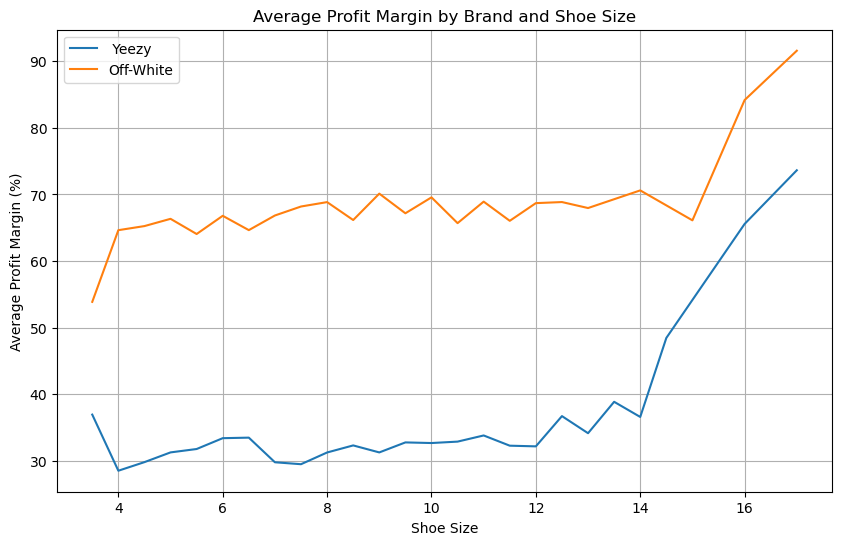

In [38]:
stock_df['Profit Margin'] = ((stock_df['sale_price'] - stock_df['retail_price']) / stock_df['sale_price']) * 100
avg_profit_margin_by_brand_and_size = stock_df.groupby(['brand', 'shoe_size'])['Profit Margin'].mean().reset_index()

plt.figure(figsize=(10, 6))
for brand, data in avg_profit_margin_by_brand_and_size.groupby('brand'):
    plt.plot(data['shoe_size'], data['Profit Margin'], label=brand)

plt.xlabel('Shoe Size')
plt.ylabel('Average Profit Margin (%)')
plt.title('Average Profit Margin by Brand and Shoe Size')
plt.legend()
plt.grid(True)
plt.show()

The line chart clearly illustrates the relationship described earlier: as shoe size increases, so does the profit margin, regardless of the brand.

### Research Question 4( Top 5 regions with the most sales?)

We're interested in understanding the performance of each region in terms of buyer activity, with a particular focus on identifying the top 5 regions with the most favorable buyer engagement.

In [39]:
#lets see the enitre region with buyers from each region
stock_df.buyer_region.value_counts()

buyer_region
California              19349
New York                16525
Oregon                   7681
Florida                  6376
Texas                    5876
New Jersey               4720
Illinois                 3782
Pennsylvania             3109
Massachusetts            2903
Michigan                 2762
Virginia                 2058
Ohio                     1890
Maryland                 1870
Washington               1863
Georgia                  1846
Arizona                  1398
North Carolina           1344
Delaware                 1242
Connecticut              1110
Indiana                  1026
Colorado                  954
Wisconsin                 840
Nevada                    790
Tennessee                 731
Minnesota                 725
Missouri                  660
South Carolina            570
Louisiana                 537
Kentucky                  488
Iowa                      460
Alabama                   457
Utah                      450
Oklahoma                  4

<Axes: xlabel='buyer_region'>

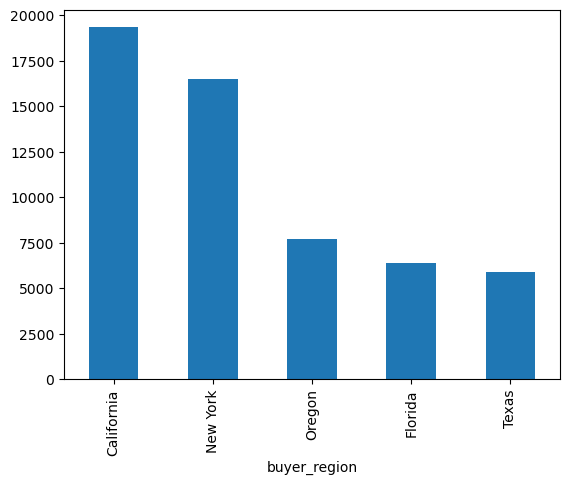

In [40]:
#Regions with the best buyers
stock_df.buyer_region.value_counts().nlargest(5).plot(kind='bar')


<Axes: xlabel='buyer_region'>

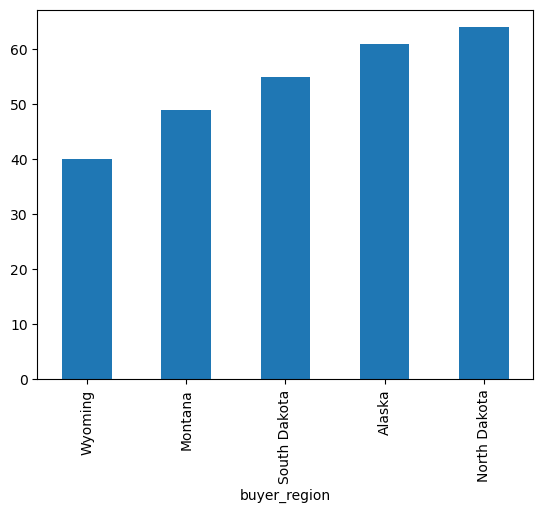

In [33]:
#regions with the least buyers 
stock_df.buyer_region.value_counts().nsmallest(5).plot(kind='bar')

Based on the charts provided, it's evident that the regions boasting the highest number of buyers, in descending order, are 'California', 'New York', 'Oregon', and 'Florida'. Conversely, the regions with the fewest buyers are 'Wyoming', 'Montana', 'South Dakota', 'Alaska', and 'North Dakota'.


### Conclusion

The result of the analysis shows that 'Yeezy' is the most popular brand and is also the most sold brand among both brands 

That being said, a couple of useful insights were drawn from the questions posed earlier at the top of the page which are as follows:

• The 'Adidas Yeezy Boost 350 V2' emerges as the topmost popular shoe, with its popularity varying across different colors. Notably, the Butter color variant leads in popularity, followed by Beluga, Zebra, Blue Tint, and Cream White, in that order.

• The shoe boasting the highest profit margin is the 'Air Jordan 1 Retro High Off-White Chicago', recording a profit margin of 95.30864. Conversely, the shoe with the lowest profit margin is the 'Adidas Yeezy Boost 350 V2 Sesame', indicating a margin of -18.27957.

• Based on the shoe size data, it's evident that shoe size correlates with profit levels. Specifically, larger shoe sizes tend to yield higher profits, whereas smaller shoe sizes result in comparatively lower profits.

• Alao the charts clearly indicate that 'California', 'New York', 'Oregon', and 'Florida' rank highest in terms of buyer numbers, while 'Wyoming', 'Montana', 'South Dakota', 'Alaska', and 'North Dakota' have the lowest number of buyers.

In [41]:
stock_df.to_csv('stock.csv')